In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

[0.   0.28 0.56 0.84 1.12 1.4  1.68 1.96 2.24 2.52 0.14 0.42 0.7  0.98
 1.26 1.54 1.82 2.1  2.38 2.66 0.   0.28 0.56 0.84 1.12 1.4  1.68 1.96
 2.24 2.52 0.14 0.42 0.7  0.98 1.26 1.54 1.82 2.1  2.38 2.66 0.   0.28
 0.56 0.84 1.12 1.4  1.68 1.96 2.24 2.52 0.14 0.42 0.7  0.98 1.26 1.54
 1.82 2.1  2.38 2.66 0.   0.28 0.56 0.84 1.12 1.4  1.68 1.96 2.24 2.52
 0.14 0.42 0.7  0.98 1.26 1.54 1.82 2.1  2.38 2.66 0.   0.28 0.56 0.84
 1.12 1.4  1.68 1.96 2.24 2.52 0.14 0.42 0.7  0.98 1.26 1.54 1.82 2.1
 2.38 2.66]


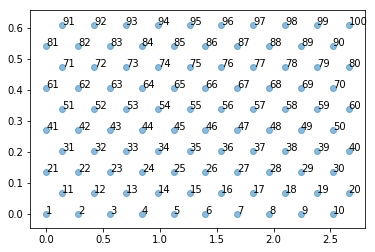

In [2]:
# Sam's way to make hex lattice:

# N must be even and this will make a lattice with N points in x and N points in y directions

N = 10
d = 0.28

# set up square mesh

nx, ny = (N, N)
x = np.linspace(0, N-1, nx)*d
y = np.linspace(0, N-1, ny)*d
xv, yv = np.meshgrid(x, y)
xv_array = np.asarray(xv).reshape(-1)
yv_array = np.asarray(yv).reshape(-1)

# scaling for hexagonal points (in y)
y_scale = np.sqrt(3)/2*d
yv_hex = yv_array*y_scale

# shift for hexagonal points (in x) - for every second row, bump a bit to the right
no_shift = np.zeros((N))
yes_shift = np.ones((N))*d/2

# vector that contains shifts for x coordinate every second row in lattice
x_shift = np.concatenate((no_shift, yes_shift), axis=0)

xv_hex = xv_array + np.tile(x_shift, N//2)
print(xv_hex)
coordinates_hex = np.vstack((xv_hex, yv_hex))
plt.scatter(coordinates_hex[0,:],coordinates_hex[1,:], alpha = 0.5)

for i in range(N**2):
    plt.text(coordinates_hex[0,i],coordinates_hex[1,i], str(i+1))

plt.show()

In [3]:
# assign random energy states to sites
E = np.random.uniform(-1, 1, (N**2))

In [4]:
# Temperature
T = 298
# Boltzmann constant
kB = 8.617332e-5
kT = kB * T

In [102]:
def neighbour(a):
    x_even = np.linspace(0.5, N-0.5, nx)*d
    sites = np.array([])
    
    # corners
    def corners(a):
        c_sites = np.array([])
        if coordinates_hex[0,a] == 0.0 and coordinates_hex[1,a] == 0.0:
            c_sites = np.append(c_sites, [a+N-1, a+2*N-1, a+N, a+1, N**2-(N-a), N**2-1])
        if coordinates_hex[0,a] == d*(N-1) and coordinates_hex[1,a] == 0.0:
            c_sites = np.append(c_sites, [a-1, a+N-1, a+N, a-N+1, N**2-1,  (N**2-1)-(N-a)])
        if coordinates_hex[0,a] == d/2 and coordinates_hex[1,a] == y_scale*d*(N-1):
            c_sites = np.append(c_sites, [a+N-1, N-(N**2-a), N-(N**2-a)+1, a+1, a-N+1,  a-N])
        if coordinates_hex[0,a] == d/2 + (N-1)*d and coordinates_hex[1,a] == y_scale*d*(N-1):
            c_sites = np.append(c_sites, [a-1, N-(N**2-a), 1, a-N+1, a-2*N+1, a-N])
        return c_sites
    
    # first last column
    def flcol(a):
        s_sites = np.array([])
        if a%N == 0:
            if xv_hex[a] in x: # odd
                s_sites = np.append(s_sites, [a+N-1, a+2*N-1, a+N, a+1, a-N, a-1])
            elif xv_hex[a] in x_even: # even
                s_sites = np.append(s_sites, [a+N-1, a+N, a+N+1, a+1, a-N+1, a-N])
        if (a+1)%N == 0:
            if xv_hex[a] in x:
                s_sites = np.append(s_sites, [a-1, a+N, a+N+1, a-N+1, a-N, a-N-1])
            elif round(xv_hex[a], 2) in x_even:
                s_sites = np.append(s_sites, [a-1, a+N, a+1, a-N+1, a-2*N+1, a-N])
        return s_sites
    
    # first last row 
    def flrow(a):
        r_sites = np.array([])
        if a in np.arange(0,N):
            r_sites = np.append(r_sites, [a-1, a+N-1, a+N, a+1, N**2-(N-a), N**2-(N-a)-1])
        if a in np.arange(N**2-N, N**2):
            r_sites = np.append(r_sites, [a-1, N-(N**2-a), N-(N**2-a)+1, a+1, a-N+1, a-N])
        return r_sites
    
    # middle
    def mid(a):
        m_sites = np.array([])
        if xv_hex[a] in x:
            m_sites = np.append(m_sites, [a-1, a+N-1, a+N, a+1, a-N-1, a-N])
        # even rows
        if xv_hex[a] in x_even:
            m_sites = np.append(m_sites, [a-1, a+N, a+N+1, a+1, a-N, a-N+1])
        return m_sites
        
    if len(corners(a))!= 0:
        sites = np.append(sites, corners(a))
        return sites
    elif len(flcol(a))!= 0:
        sites = np.append(sites, flcol(a))
        return sites
    elif len(flrow(a))!= 0:
        sites = np.append(sites, flrow(a))
        return sites
    else:
        sites = np.append(sites, mid(a))
        return sites
    
    
print(neighbour(42))

[41. 51. 52. 43. 31. 32.]


In [167]:
# generate random initial point
# in lattice, a = a+1
# a = np.random.randint(0,N**2)
a = 56
# track positions
pos = [a]

angle = 60/180*np.pi
E_ext = np.array([1, np.cos(angle), -np.cos(angle), -1, -np.cos(angle), np.cos(angle)])

for n in range(10):
    dE = np.array([])
    for i in neighbour(a):
        i = i.astype(int)
        # energy difference 
        dE = np.append(dE, E[i]-E[a])
        
    # total energy (E_ext = 0 without applied field)
    E_tot = dE + E_ext
    # rate of hopping, v = 1*exp(-dE/kT)
    v =  np.exp(-E_tot/kT)

    # generate random number
    Randnum = random.uniform(0,1)
    # set position of pointer
    rk = Randnum * np.sum(v)
    # cumulative sum of energy
    k = np.cumsum(v)
    
    # going through k1, k1+k2...., ktotal
    check = []
    for i in np.nditer(k):
        # if value smaller than pointer, append to check
        if i < rk:
            check.append(i) 
    if len(check) == 0:
        a = (neighbour(a)[0]).astype(int)
    elif len(check) == 1:
        a = (neighbour(a)[1]).astype(int)
    elif len(check) == 2:
        a = (neighbour(a)[2]).astype(int)
    elif len(check) == 3:
        a = (neighbour(a)[3]).astype(int)
    elif len(check) == 4:
        a = (neighbour(a)[4]).astype(int)
    elif len(check) == 5:
        a = (neighbour(a)[5]).astype(int)
    
    pos.append(a)
print(pos)

[56, 57, 58, 59, 50, 61, 62, 63, 64, 65, 66]


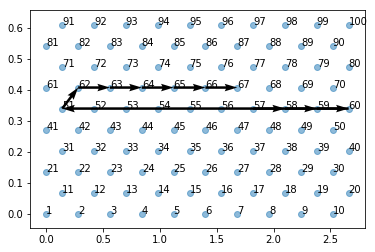

In [168]:
plt.scatter(coordinates_hex[0,:],coordinates_hex[1,:], alpha = 0.5)

for i in range(N**2):
    plt.text(coordinates_hex[0,i],coordinates_hex[1,i], str(i+1))

plt.quiver(xv_hex[pos[:-1]], yv_hex[pos[:-1]], xv_hex[pos[1:]]-xv_hex[pos[:-1]], yv_hex[pos[1:]]-yv_hex[pos[:-1]], scale_units='xy', angles='xy',scale=1)

plt.show()